In [ ]:
*Bagging: Bootstrap Aggregating의 약자로, 각  모델에 다른 학습데이터 셋을 이용해 결과값을 취합하는 앙상블 기법
- Bootstrap: 복원 추출(sampling with replacement)을 통해 샘플링 된 각 데이터 셋
- Aggregating: 각 모델의 결과값을 취합하는 단계(e.g. majority voting, weighted voting, stacking)
- 특징은, 각 모델이 서로에게 Independent한 성질을 지녀 다양성 측면에서 implicit하다고 할 수 있음

1. k-fold data split: 비복원 추출 기법
2. Random Forests: 복원 추출 기법으로 원래 학습데이터 개체 수 만큼을 샘플링하여 여러 decision
    tree를 형성하는 앙상블 기법, 변수 중요도 산출

## K-data split

In [ ]:
* K-Fold는 모든 샘플을 동일한 크기(가능한 경우)로 folds라고 하는 샘플 그룹으로 나눔.
  각 반복마다 K-1 folds를 사용하여 학습하고, 남은 fold는 테스트에 사용함

In [67]:
import numpy as np
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d"]
kf = KFold(n_splits=4) # n_splits= k : 한 데이터 셋 내, k-1개의 train data를 만든다는 뜻, 나머지는 test
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


### Repeated K-fold

In [ ]:
*Repeated K-Fold는 K-Fold를 여러 번 반복하는 것으로, 각 반복마다 서로 다른 fold을 생성함

In [73]:
import numpy as np
from sklearn.model_selection import RepeatedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
random_state = 12883823
rkf = RepeatedKFold(n_splits=4, n_repeats=3, random_state=random_state)
for train, test in rkf.split(X):
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]
[0 2 3] [1]
[0 1 2] [3]
[0 1 3] [2]
[1 2 3] [0]
[0 1 3] [2]
[0 2 3] [1]
[0 1 2] [3]
[1 2 3] [0]


In [ ]:
* k-fold는 전체 데이터를 K개의 블록으로 나누고 개별 모델을 서로 다른 (k-1)개의 subset에 대해 
  학습 한 뒤, 최종 결과 aggregate할 때 사용됨. 비복원 추출이라는 점에서 merit를 가짐

## Random Forests with bagging

In [ ]:
* Random Forests란, 다수의 decision tree모델에
- 동일하지 않은 데이터셋(크기는 동일, 중복가능)을 '독립적'으로 학습 시킨 후,
- 결과를 majority voting과 같이 취합하는 모델임
- bagging의 대표적인 모델이라 할 수 있음

In [27]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

####  scikit-learn활용

In [49]:
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [48]:
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [51]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [52]:
iris_data = datasets.load_iris()
X = iris_data.data[:, [2,3]]
y = iris_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [53]:
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train) # 학습데이터 정규화
X_test_std = sc.transform(X_test) # 학습데이터 정규화

In [55]:
#### Gini impurity ####
# k개의 decision tree를 형성하도록 설정함(n_estimators: tree개수)
gini_RF = RandomForestClassifier(criterion='gini', n_estimators=1000,
                                 n_jobs = 4,random_state=1) # Gini impurity
gini_RF.fit(X_train_std, y_train)
y_pred = gini_RF.predict(X_test_std)

print('total train data: %d' %(len(y_train)))
print('total test data: %d, # of errors: %d' %(len(y_test), (y_test != y_pred).sum()))
print('Accuracy_using_gini: %.4f' % accuracy_score(y_test, y_pred))

total train data: 105
total test data: 45, # of errors: 1
Accuracy_using_gini: 0.9778


<AxesSubplot:>

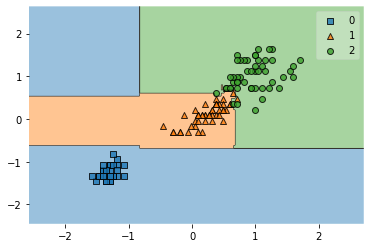

In [61]:
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X = X_combined, y = y_combined, clf=gini_RF,
                     filler_feature_ranges = range(105,150))#, title='Random Forest w/ gini impurity')

In [62]:
#### Gini impurity ####
# k개의 decision tree를 형성하도록 설정함(n_estimators: tree개수)
ig_RF = RandomForestClassifier(criterion='entropy', n_estimators=1000, 
                               n_jobs = 4,random_state=1) #information gain
ig_RF.fit(X_train_std, y_train)
y_pred = ig_RF.predict(X_test_std)

print('total train data: %d' %(len(y_train)))
print('total test data: %d, # of errors: %d' %(len(y_test), (y_test != y_pred).sum()))
print('Accuracy_using_gini: %.4f' % accuracy_score(y_test, y_pred))

total train data: 105
total test data: 45, # of errors: 1
Accuracy_using_gini: 0.9778


<AxesSubplot:>

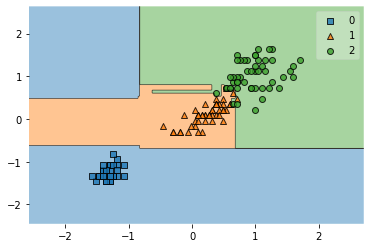

In [63]:
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X = X_combined, y = y_combined, clf=ig_RF,
                     filler_feature_ranges = range(105,150))#, title='Random Forest w/ gini impurity')

In [ ]:
*결과해석: 하나의 decision tree로는 overfitting이 쉽게 일어날 수 있지만, 다수의 tree모델을 사용하여
    각기 다른 데이터셋으로 학습을 시켜 일반화된 tree를 만들었음. 앙상블 모델로, 여러개의 형성된
    tree모델에 새로운 데이터를 통과시키며, 각 트리가 분류한 결과에서 voting을 실시하여 가장 많이
    득표한 결과를 최종 분류 결과로 선택함
    
    또한, Information Gain(IG)과 Gini impurity를 기준으로 split을 진행하여 비교한 결과, 분류 정확도와
    error카운트수가 동일한것으로 보아, 붓꽃 데이터와 같이 단순데이터에 대해선 큰 차이가 없음을 확인
    하였다.